In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mig_mal.csv')

In [3]:
# Data Cleaning

# Check for missing values per column
print("Missing values by column:")
print(df.isnull().sum())

# Handle missing values - example: fill numeric NaN with 0 or median or drop rows
df['MigrationNet'] = df['MigrationNet'].fillna(0)
df['Value'] = df['Value'].fillna(df['Value'].median())

# If categorical columns exist (like National Unit), ensure consistent formatting
df['National Unit'] = df['National Unit'].str.strip().str.title()

# Check data types
print("\nData Types:")
print(df.dtypes)

# Convert Year to int if needed
df['Year'] = df['Year'].astype(int)



Missing values by column:
National Unit     0
Year              0
Value             0
MigrationNet     59
dtype: int64

Data Types:
National Unit     object
Year               int64
Value            float64
MigrationNet     float64
dtype: object


In [4]:
# Basic Statistics
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
              Year       Value  MigrationNet
count   125.000000  125.000000  1.250000e+02
mean   2012.000000   29.796031 -2.867583e+04
std       7.240121   39.755512  1.960555e+05
min    2000.000000    0.000000 -1.356759e+06
25%    2006.000000    0.028105 -3.033100e+04
50%    2012.000000    9.531271  0.000000e+00
75%    2018.000000   42.106346  0.000000e+00
max    2024.000000  156.257719  4.943640e+05


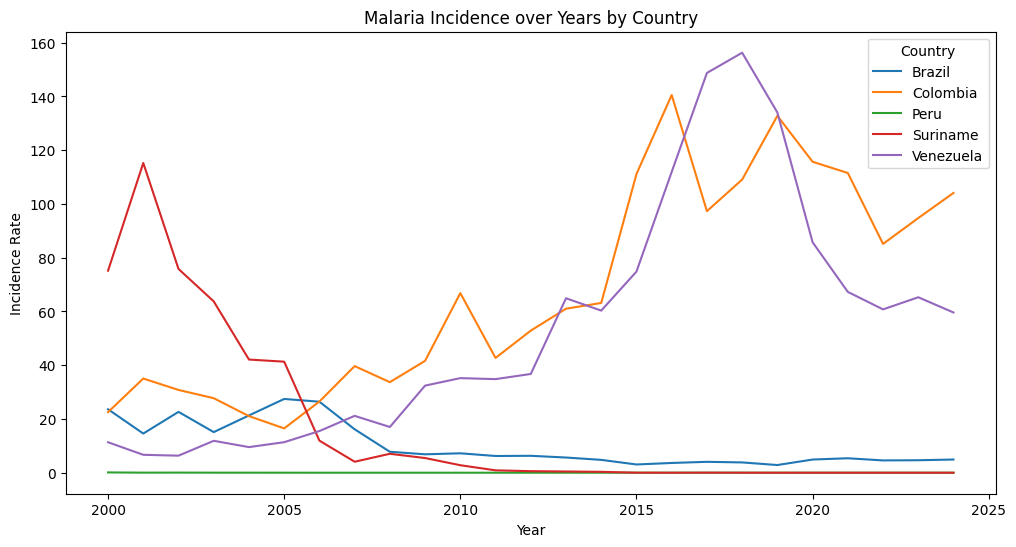

In [5]:
# Exploratory Data Analysis (EDA)

# Plot malaria incidence over years by country
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Value', hue='National Unit')
plt.title('Malaria Incidence over Years by Country')
plt.ylabel('Incidence Rate')
plt.xlabel('Year')
plt.legend(title='Country')
plt.show()

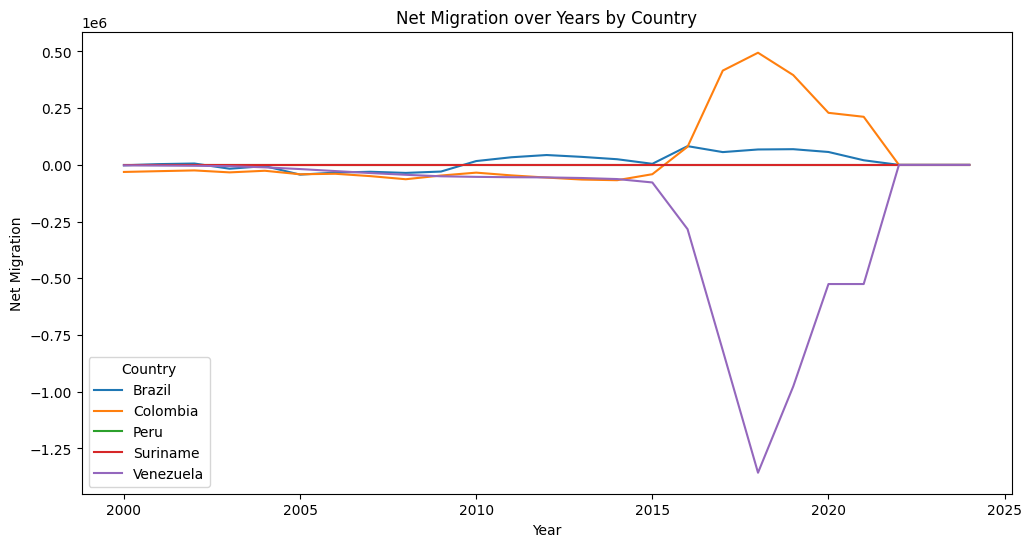

In [6]:
# Plot migration net by year by country
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='MigrationNet', hue='National Unit')
plt.title('Net Migration over Years by Country')
plt.ylabel('Net Migration')
plt.xlabel('Year')
plt.legend(title='Country')
plt.show()

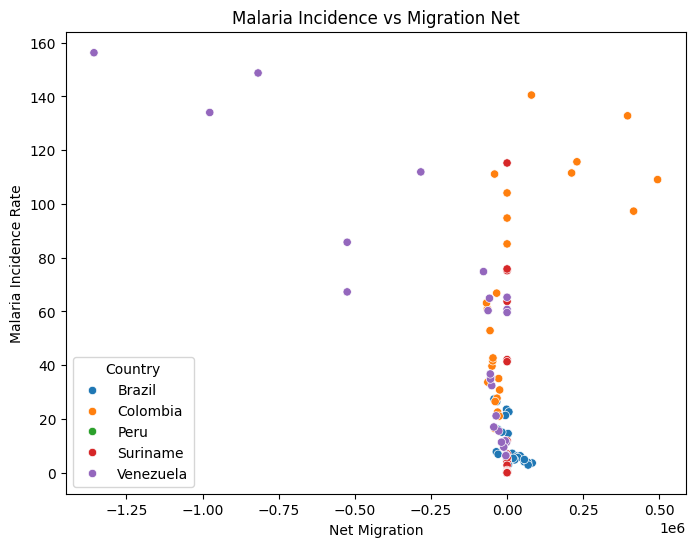

In [7]:
# Scatter plot of malaria incidence vs migration net
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='MigrationNet', y='Value', hue='National Unit')
plt.title('Malaria Incidence vs Migration Net')
plt.xlabel('Net Migration')
plt.ylabel('Malaria Incidence Rate')
plt.legend(title='Country')
plt.show()

/var/folders/hg/gkyx41xn2gx8rv31p0sg09w40000gn/T/ipykernel_46541/719988775.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year', y='Percentage Change', hue='Metric', data=df_plot,


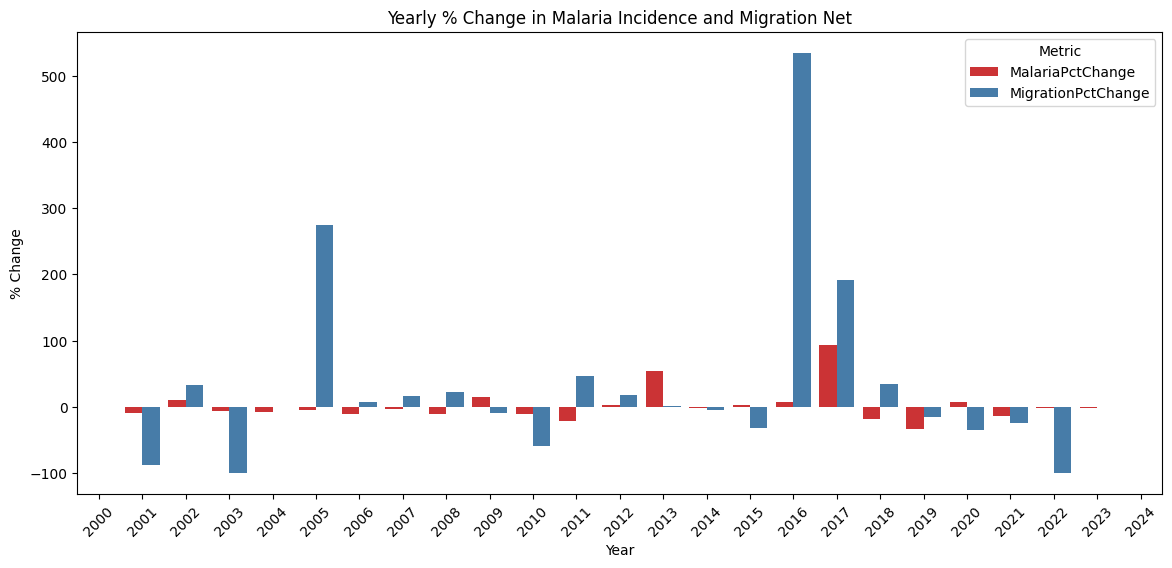

In [10]:
# 2. Yearly % Change Bar Plot (malaria incidence vs migration net % change)
df['MalariaPctChange'] = df.groupby('National Unit')['Value'].pct_change() * 100
df['MigrationPctChange'] = df.groupby('National Unit')['MigrationNet'].pct_change() * 100

df_plot = df.melt(id_vars=['Year', 'National Unit'], value_vars=['MalariaPctChange', 'MigrationPctChange'],
                  var_name='Metric', value_name='Percentage Change')

plt.figure(figsize=(14, 6))
sns.barplot(x='Year', y='Percentage Change', hue='Metric', data=df_plot,
            palette='Set1', ci=None)
plt.title('Yearly % Change in Malaria Incidence and Migration Net')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('% Change')
plt.show()

/var/folders/hg/gkyx41xn2gx8rv31p0sg09w40000gn/T/ipykernel_46541/3625443930.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['RollingCorr'] = df.groupby('National Unit').apply(


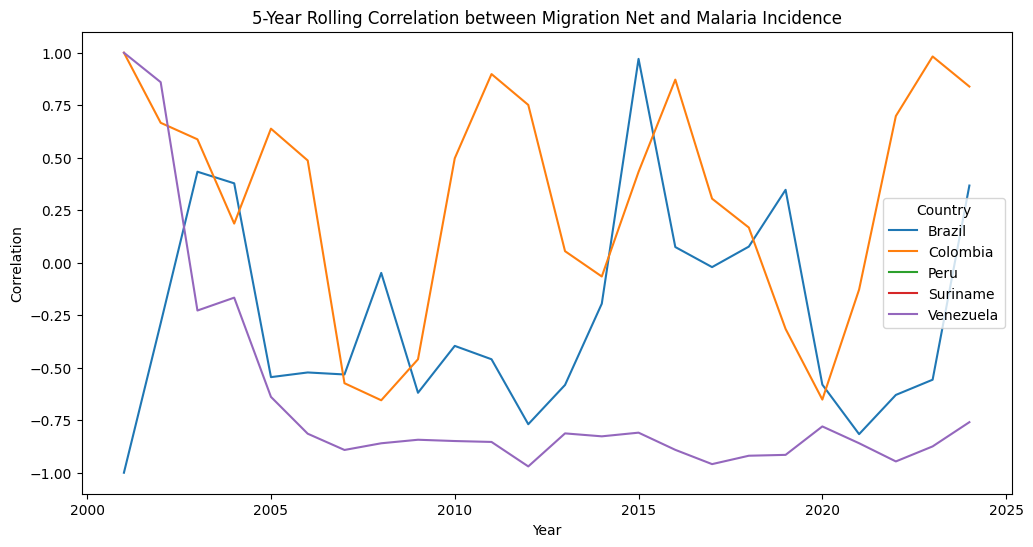

In [11]:
# 3. Rolling Correlation Plot (5 year rolling correlation between migration and malaria)
df['RollingCorr'] = df.groupby('National Unit').apply(
    lambda x: x['Value'].rolling(window=5, min_periods=1).corr(x['MigrationNet'])
).reset_index(level=0, drop=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='RollingCorr', hue='National Unit')
plt.title('5-Year Rolling Correlation between Migration Net and Malaria Incidence')
plt.xlabel('Year')
plt.ylabel('Correlation')
plt.legend(title='Country')
plt.show()